# **IBM Hack CHallenge**
## *AI Based Personalized Electronic Product Recommendation System*
## ***Notebook-1: Data Cleaning & Preprocessing***

### Participants:
1. Name: Atyam V V R Manoj
2. Name: Narra Varsha



## Objective: 
Recommendation	systems	widely	exist	in	many online	applications. In this project, we try to build an web application with a simple UI that work on	a very	typical	and	classical	recommendation	system	scenario,	that is Electronic Product Recommendation	in	E-commerce,	i.e.,	Amazon.

The overall objective is to build a simple web app with an User Interface. The user would be able to choose between categories of different electronic products and the relevant recommendations would be displayed based on User-Based-Similarity.

### Project description:
The data required for this project is taken from the website (http://snap.stanford.edu/data/web-Amazon-links.html). It contains	user reviews	(numerical	rating	and	textual	comment)	towards	amazon	products	on	24	product	categories(e.g.,	cell	phones, clothing,	beauty,	etc.),	and	there is	an	independent	dataset	for	each	product	category. We will select 5 product categories in this project i.e., **Cell_Phones_&_Accessories.txt.gz, Watches.txt.gz and Electronics.txt.gz**. On choosing the category of product, recommendations are displayed based on user based similarity. (Collaborative Filtering)


After we select	a dataset	to	work	on,	this	project will	mainly	consist three	
steps:	
* Data	Processing
* create	the	training	and	testing datasets
* Conduct	rating	prediction and	make	evaluation
* Conduct	Top-N	Recommendation	

### **Metadata:**
Each entry	in	a	dataset	is	a	user-item	interaction	record,	including the following fields:
* product/productId:  asin, e.g. amazon.com/dp/B00006HAXW
* product/title:  title of the product
* product/price:  price of the product
* review/userId:  id of the user, e.g. A1RSDE90N6RSZF
* review/profileName:  name of the user
* review/helpfulness:  fraction of users who found the review helpful
* review/score:  rating of the product
* review/time:  time of the review (unix time)
* review/summary:  review summary
* review/text:  text of the review

#### Importing required libraries

In [ ]:
pip install simplejson


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 130 kB 8.0 MB/s 


In [ ]:
import gzip
import simplejson
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings 
# Set action = "ignore" to ignore warnings
warnings.filterwarnings(action= 'ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Parsing and converting the file into a dataframe

In [ ]:
def parse(filename):
    f = gzip.open(filename, 'r')
    entry = {}
    for l in f:
        l = l.strip()
        l = l.decode()
        colonPos = l.find(':')
        if colonPos == -1:
            yield entry
            entry = {}
            continue
        eName = l[:colonPos]
        rest = l[colonPos+2:]
        entry[eName] = rest
    yield entry
    
def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')
        
# data = []
# for e in parse("Arts.txt.gz"):
#     data.append(e)
# data

In [ ]:
# Removing unnecessary attributes and renaming all the remaining columns
# for better understanding

def rename_columns(df):
    df.drop(columns =['review/time','review/profileName','review/helpfulness'],inplace = True)
    df.rename(columns= {'product/productId':'ProductID','product/title':'ProductName','product/price':'Price','review/userId':'UserID','review/score':'rating','review/summary':'review_summary','review/text':'review_text'},inplace=True)
    
    return df

### Importing the datasets

In [ ]:
# Importing the Arts, Cell_Phones_&_Accessories, Jewelry, Musical_Instruments
#  Watches categories of products.

df_Elec = rename_columns(getDF('/content/drive/MyDrive/Recommendation-System/ML Mini Project/Electronics.txt.gz'))
df_Cell = rename_columns(getDF('/content/drive/MyDrive/Recommendation-System/ML Mini Project/Cell_Phones_&_Accessories.txt.gz'))
df_Wat = rename_columns(getDF('/content/drive/MyDrive/Recommendation-System/ML Mini Project/Watches.txt.gz'))

In [ ]:
df_Elec.head()

,ProductID,ProductName,Price,UserID,rating,review_summary,review_text
0,B0000630MQ,Kodak Max K2000 Battery Charger with 4 NiMH AA...,unknown,A2F6FARSB1VL6Q,5.0,Great charger,I recently bought this charger kit from Amazon...
1,B0000630MQ,Kodak Max K2000 Battery Charger with 4 NiMH AA...,unknown,unknown,5.0,Super product! I'm very happy.,"The batteries are excellent (1850's), and the ..."
2,B0000630MQ,Kodak Max K2000 Battery Charger with 4 NiMH AA...,unknown,A3P56Q3XEGTBNY,2.0,Problem with charging smaller AAAs,I have had the charger for more than two years...
3,B0000630MQ,Kodak Max K2000 Battery Charger with 4 NiMH AA...,unknown,unknown,5.0,CHECK OUT THE K6000 CHARGER!,Greetings. Kodak also has a K6000 charger whic...
4,B0000630MQ,Kodak Max K2000 Battery Charger with 4 NiMH AA...,unknown,AZIM9ZTGB8Q12,5.0,Finally a Great recharger with batteries!,I have used and recharged my batteries nearly ...


In [ ]:
df_Elec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241778 entries, 0 to 1241777
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ProductID       1241778 non-null  object
 1   ProductName     1241778 non-null  object
 2   Price           1241778 non-null  object
 3   UserID          1241778 non-null  object
 4   rating          1241778 non-null  object
 5   review_summary  1241778 non-null  object
 6   review_text     1241778 non-null  object
dtypes: object(7)
memory usage: 75.8+ MB


There are no null values in the dataset

#### Checking the values in the different attributes

In [ ]:
pd.DataFrame(df_Elec['Price'].value_counts())

,Price
unknown,643429
3.98,7689
9.99,7210
19.99,6846
18.95,6426
...,...
10.35,1
235.90,1
139.14,1
112.54,1


In [ ]:
pd.DataFrame(df_Elec['UserID'].value_counts())

,UserID
unknown,52227
A5JLAU2ARJ0BO,509
AYA4HL04UH8JT,310
A231WM2Z2JL0U3,294
ARBKYIVNYWK3C,244
...,...
A1R5FS8Y9POJ8X,1
A2T24PLX4RXILK,1
A3CBVNW8A6Y0JI,1
APM0Z7QXSLA1S,1


Even though, there are no null values, there are 'unknown' values in the attributes, hence we can ignore such data

In [ ]:
# Checking for unknown values in all columns and removing them.

df_Elec = df_Elec[df_Elec["Price"]!='unknown']
print(df_Elec.shape)

# we can also drop duplicate values if there are any.

df_Elec.drop_duplicates(inplace=True)
print(df_Elec.shape)

(598349, 7)
(597135, 7)


df_Arts.head()

#### Converting price and rating columns to numeric and observing descriptive statistics

In [ ]:
df_Elec['Price'] = pd.to_numeric(df_Elec['Price'])
df_Elec['rating'] = pd.to_numeric(df_Elec['rating'])

In [ ]:
df_Elec.describe()

,Price,rating
count,597135.000000,597135.000000
mean,66.051220,3.992566
std,114.198706,1.402875
min,0.010000,1.000000
25%,11.000000,3.000000
50%,26.380000,5.000000
75%,65.000000,5.000000
max,999.990000,5.000000


In [ ]:
df_Elec['review_summary'].describe()

count            597135
unique           394180
top       Great Product
freq               2073
Name: review_summary, dtype: object

In [ ]:
df_Elec['review_text'].describe()

count                                                597135
unique                                               563152
top       I needed a short CAT5 cable to connect my rout...
freq                                                     42
Name: review_text, dtype: object

### Vizualising the distribution of overall product ratings

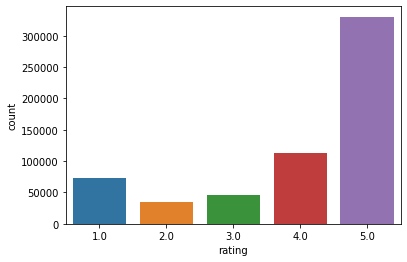

In [ ]:
sns.countplot(df_Elec['rating'])

In [ ]:
# Applying value_counts after removing unknowns
pd.DataFrame(df_Elec["UserID"].value_counts())

,UserID
unknown,7820
ARBKYIVNYWK3C,190
A5JLAU2ARJ0BO,103
A3OXHLG6DIBRW8,102
A203OCQQ12MAVT,97
...,...
A3HEXZ8GF2PMO0,1
A343Q98K95S6BV,1
A3V1J4LJPEZGI8,1
A60QCXWIWP7M7,1


We can observe that most of the users gave a rating of 5

In [ ]:
# Count of total ratings,users and products
print("\nTotal no of ratings :",df_Elec.shape[0])
print("Total No of Users   :", len(np.unique(df_Elec.UserID)))
print("Total No of products  :", len(np.unique(df_Elec.ProductID)))


Total no of ratings : 597135
Total No of Users   : 449774
Total No of products  : 30584


In [ ]:
#Analysis of rating given by the user 
rating_per_user = df_Elec.groupby(by='UserID')['rating'].count().sort_values(ascending=False)
rating_per_user.head()

UserID
unknown           7820
ARBKYIVNYWK3C      190
A5JLAU2ARJ0BO      103
A3OXHLG6DIBRW8     102
A203OCQQ12MAVT      97
Name: rating, dtype: int64

In [ ]:
#Analysis of rating given to the product 
rating_per_product = df_Elec.groupby(by='ProductID')['rating'].count().sort_values(ascending=False)
rating_per_product.head()

ProductID
B0002L5R78    7588
B000LRMS66    5875
B000JMJWV2    3298
B0001FTVEK    3188
B000NWS3SG    2965
Name: rating, dtype: int64

### **Text cleaning**

In [ ]:
contractions={
    "ain't": "are not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how're": "how are",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you shall have",
    "you're": "you are",
    "you've": "you have",
    "doin'": "doing",
    "goin'": "going",
    "nothin'": "nothing",
    "somethin'": "something",
}

In [ ]:
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [ ]:
df_Elec["review_text"] = df_Elec["review_text"].apply(lambda x:cont_to_exp(x))
df_Elec["review_summary"] = df_Elec["review_summary"].apply(lambda x:cont_to_exp(x))
df_Elec.head()

,ProductID,ProductName,Price,UserID,rating,review_summary,review_text
85,B000P9JTW6,Gomadic Compact Retractable USB Charge and Dat...,17.69,A2T7YFEAI0X74W,4.0,nifty,It is very convenient to have the charging cab...
86,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,A1Y8DLP78Z778V,5.0,APC P1T 120V Portable Surge Protector,Perfect carry-along for my notebook PC. Useful...
87,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,AAF3I3SZ6CXGY,5.0,Insurance policy!,This protector is an excellent value. Rated ve...
88,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,ARA1MZKJQLXGE,5.0,Works great for appliances,I bought one of these to protect my washing ma...
89,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,A2P9Q94AA63517,5.0,Single Surge Protector,Just right for travel for my computer and it i...


In [ ]:
# Splitting the summary and text into list of words
df_Elec['review_summary'] = df_Elec['review_summary'].apply(lambda x:x.split())
df_Elec['review_text'] = df_Elec['review_text'].apply(lambda x:x.split())
df_Elec.head()

,ProductID,ProductName,Price,UserID,rating,review_summary,review_text
85,B000P9JTW6,Gomadic Compact Retractable USB Charge and Dat...,17.69,A2T7YFEAI0X74W,4.0,[nifty],"[It, is, very, convenient, to, have, the, char..."
86,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,A1Y8DLP78Z778V,5.0,"[APC, P1T, 120V, Portable, Surge, Protector]","[Perfect, carry-along, for, my, notebook, PC.,..."
87,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,AAF3I3SZ6CXGY,5.0,"[Insurance, policy!]","[This, protector, is, an, excellent, value., R..."
88,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,ARA1MZKJQLXGE,5.0,"[Works, great, for, appliances]","[I, bought, one, of, these, to, protect, my, w..."
89,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,A2P9Q94AA63517,5.0,"[Single, Surge, Protector]","[Just, right, for, travel, for, my, computer, ..."


In [ ]:
# removing white spaces between the words in summary and text
df_Elec['review_summary'] = df_Elec['review_summary'].apply(lambda x:[i.replace(" ","") for i in x])
df_Elec['review_text'] = df_Elec['review_text'].apply(lambda x:[i.replace(" ","") for i in x])
df_Elec.head()

,ProductID,ProductName,Price,UserID,rating,review_summary,review_text
85,B000P9JTW6,Gomadic Compact Retractable USB Charge and Dat...,17.69,A2T7YFEAI0X74W,4.0,[nifty],"[It, is, very, convenient, to, have, the, char..."
86,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,A1Y8DLP78Z778V,5.0,"[APC, P1T, 120V, Portable, Surge, Protector]","[Perfect, carry-along, for, my, notebook, PC.,..."
87,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,AAF3I3SZ6CXGY,5.0,"[Insurance, policy!]","[This, protector, is, an, excellent, value., R..."
88,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,ARA1MZKJQLXGE,5.0,"[Works, great, for, appliances]","[I, bought, one, of, these, to, protect, my, w..."
89,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,A2P9Q94AA63517,5.0,"[Single, Surge, Protector]","[Just, right, for, travel, for, my, computer, ..."


In [ ]:
# merging both the lists of words of review_summary and review_text under 
# a single column tags
df_Elec['tags'] = df_Elec['review_summary'] + df_Elec['review_text']
df_Elec.head()

,ProductID,ProductName,Price,UserID,rating,review_summary,review_text,tags
85,B000P9JTW6,Gomadic Compact Retractable USB Charge and Dat...,17.69,A2T7YFEAI0X74W,4.0,[nifty],"[It, is, very, convenient, to, have, the, char...","[nifty, It, is, very, convenient, to, have, th..."
86,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,A1Y8DLP78Z778V,5.0,"[APC, P1T, 120V, Portable, Surge, Protector]","[Perfect, carry-along, for, my, notebook, PC.,...","[APC, P1T, 120V, Portable, Surge, Protector, P..."
87,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,AAF3I3SZ6CXGY,5.0,"[Insurance, policy!]","[This, protector, is, an, excellent, value., R...","[Insurance, policy!, This, protector, is, an, ..."
88,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,ARA1MZKJQLXGE,5.0,"[Works, great, for, appliances]","[I, bought, one, of, these, to, protect, my, w...","[Works, great, for, appliances, I, bought, one..."
89,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,A2P9Q94AA63517,5.0,"[Single, Surge, Protector]","[Just, right, for, travel, for, my, computer, ...","[Single, Surge, Protector, Just, right, for, t..."


In [ ]:
new_Elec = df_Elec[['UserID','ProductID','rating','tags']]
new_Elec['tags']  = new_Elec['tags'].apply(lambda x:" ".join(x))
print(new_Elec.shape)
new_Elec.head()

(597135, 4)


,UserID,ProductID,rating,tags
85,A2T7YFEAI0X74W,B000P9JTW6,4.0,nifty It is very convenient to have the chargi...
86,A1Y8DLP78Z778V,B0000DFZ2U,5.0,APC P1T 120V Portable Surge Protector Perfect ...
87,AAF3I3SZ6CXGY,B0000DFZ2U,5.0,Insurance policy! This protector is an excelle...
88,ARA1MZKJQLXGE,B0000DFZ2U,5.0,Works great for appliances I bought one of the...
89,A2P9Q94AA63517,B0000DFZ2U,5.0,Single Surge Protector Just right for travel f...


### Defining functions for pre-processing and text cleaning instead of writing entire code for each dataset

In [ ]:
def preprocessing(df):
    print("Quick summary of the dataset: \n")
    df.info()
    
    print("\n\nChecking the values in the 'price' attribute\n")
    print(pd.DataFrame(df['Price'].value_counts()))
    print("\n\nChecking the values in the 'UserID' attribute\n")
    print(df['UserID'].value_counts())

    print("There are total ",df.UserID.shape[0]," userid's in this category")
    
    print("\nChecking for unknown values in all columns and removing them.\n")

    for i in df.columns:
        df = df[df[i]!='unknown']
    print("Shape: ")
    print(df.shape)

    # we can also drop duplicate values if there are any.
    print("\nwe can also drop duplicate values if there are any.\n")
    #df.drop_duplicates(inplace=True)
    print("Shape: ")
    print(df.shape)
    
    print("\nconverting price and rating columns to numeric and observing descriptive statistics\n")
    df['Price'] = pd.to_numeric(df['Price'])
    df['rating'] = pd.to_numeric(df['rating'])
    
    print(df.describe())
    print("\nDescriptive statistics for summary\n")
    print(df['review_summary'].describe())
    print("\nDescriptive statistics for text\n")
    print(df['review_text'].describe())
    
    
    
    print("\nCount of total ratings,users and products\n")
    print("\nTotal no of ratings :",df.shape[0])
    print("Total No of Users   :", len(np.unique(df.UserID)))
    print("Total No of products  :", len(np.unique(df.ProductID)))
    
    print("\nAnalysis of rating given by the user \n")
    rating_per_user = df.groupby(by='UserID')['rating'].count().sort_values(ascending=False)
    print(rating_per_user.head())
    
    
    print("\nAnalysis of rating given to the product \n")
    rating_per_product = df.groupby(by='ProductID')['rating'].count().sort_values(ascending=False)
    print(rating_per_product.head())
    
    print("\nVizualising the distribution of overall product ratings\n")

    print(sns.countplot(df['rating']))
    
    return df

In [ ]:
def text_cleaning(df):
    
    df["review_text"] = df["review_text"].apply(lambda x:cont_to_exp(x))
    df["review_summary"] = df["review_summary"].apply(lambda x:cont_to_exp(x))
    print(df.head())
    
    print("\n\nSplitting the summary and text into list of words\n\n")
    #df['review_summary'] = df['review_summary'].apply(lambda x:x.split())
    #df['review_text'] = df['review_text'].apply(lambda x:x.split())
    print(df.head())
    
    print("\n\nRemoving white spaces between the words in summary and text\n\n")
    df['review_summary'] = df['review_summary'].apply(lambda x:[i.replace(" ","") for i in x])
    df['review_text'] = df['review_text'].apply(lambda x:[i.replace(" ","") for i in x])
    print(df.head())
    
    print("\nmerging both the lists of words of review_summary and review_text under a single column tags\n")
    df['tags'] = df['review_summary'] + df['review_text']
    print(df.head())
    
    print("\nCreating new dataframe with UserID, productID, rating and tags\n")
    new = df[['UserID','ProductID','rating','tags']]
    new['tags']  = new['tags'].apply(lambda x:" ".join(x))
    print(new.shape)
    print(new.head())
    
    return new
    

Quick summary of the dataset: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78930 entries, 0 to 78929
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductID       78930 non-null  object
 1   ProductName     78930 non-null  object
 2   Price           78930 non-null  object
 3   UserID          78930 non-null  object
 4   rating          78930 non-null  object
 5   review_summary  78930 non-null  object
 6   review_text     78930 non-null  object
dtypes: object(7)
memory usage: 4.8+ MB


Checking the values in the 'price' attribute

         Price
unknown  43287
89.99     3452
29.99     1099
6.99       851
19.99      755
...        ...
6.10         1
3.78         1
21.75        1
14.40        1
115.00       1

[944 rows x 1 columns]


Checking the values in the 'UserID' attribute

unknown           2276
A1RCGK44YXNBBB      44
A5JLAU2ARJ0BO       44
A2C8IPPOF90CJG      38
A33FS5H3CPDR6D      31
        

,ProductID,ProductName,Price,UserID,rating,review_summary,review_text
19,B000B6MY2U,Samsung T809 M620 i607 U420 A303 A717 Car Char...,6.75,A1RCOK89DON3YN,5.0,Great Buy!!,I thought this item was great for the money. I...
20,B000B6MY2U,Samsung T809 M620 i607 U420 A303 A717 Car Char...,6.75,A1IDTV3JKFOLVT,4.0,Charger works great,The charger works fine as advertised. The loca...
30,B00004WINT,Jabra EarGels - Clear,9.70,A29UBSC2VMDUL4,5.0,Jawbone Ear Fix,If you have had an issue with the Jawbone head...
31,B00004WINT,Jabra EarGels - Clear,9.70,A7QCUJOH9CIYR,5.0,Jabra gels fit well on my aliph jawbone after ...,I accidentally tore the original factory bud o...
32,B00004WINT,Jabra EarGels - Clear,9.70,AX73D8OAWC7TF,4.0,Fit is execellent.,Used these to replace the painfuly uncomfortab...
...,...,...,...,...,...,...,...
78798,B0007XCT22,Maxell P-10 Cassette Adapter,10.13,A1BD4AEN06FFMJ,1.0,"DON""T BUY. Or You WIll Regret.",I do not leave feedback of any kind on amazon....
78799,B0007XCT22,Maxell P-10 Cassette Adapter,10.13,A3V6Z4RCDGRC44,5.0,Get 2 or 3 of them,If you've ever used any sort of cassette tape ...
78800,B0007XCT22,Maxell P-10 Cassette Adapter,10.13,AWTOK5EK2M1BF,5.0,Get the tape before you choose a more expensiv...,"Seriously,A Tape adapter is CHEAP, its easy, a..."
78801,B000MO0JCI,"Cell Phone Battery for Samsung D500 Li-Ion, Li...",12.69,A8XRINNUX92NY,1.0,Never got it...,1 month and 2 days later i still havent reciev...


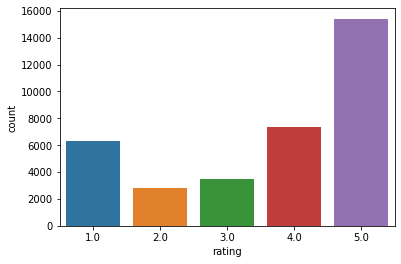

In [ ]:
# Applying pre-processing on the Cell Phones & Accesories dataset

df_Cell_Pre = preprocessing(df_Cell)
df_Cell_Pre

In [ ]:
#Text Preprocessing on Cell phones & Accesories dataset

new_Cell = text_cleaning(df_Cell_Pre)
new_Cell

     ProductID                                        ProductName  Price  \
19  B000B6MY2U  Samsung T809 M620 i607 U420 A303 A717 Car Char...   6.75   
20  B000B6MY2U  Samsung T809 M620 i607 U420 A303 A717 Car Char...   6.75   
30  B00004WINT                              Jabra EarGels - Clear   9.70   
31  B00004WINT                              Jabra EarGels - Clear   9.70   
32  B00004WINT                              Jabra EarGels - Clear   9.70   

            UserID  rating                                     review_summary  \
19  A1RCOK89DON3YN     5.0                                        Great Buy!!   
20  A1IDTV3JKFOLVT     4.0                                Charger works great   
30  A29UBSC2VMDUL4     5.0                                    Jawbone Ear Fix   
31   A7QCUJOH9CIYR     5.0  Jabra gels fit well on my aliph jawbone after ...   
32   AX73D8OAWC7TF     4.0                                 Fit is execellent.   

                                          review_text  


,UserID,ProductID,rating,tags
19,A1RCOK89DON3YN,B000B6MY2U,5.0,G r e a t B u y ! ! I t h o u g h t t h i s...
20,A1IDTV3JKFOLVT,B000B6MY2U,4.0,C h a r g e r w o r k s g r e a t T h e c h...
30,A29UBSC2VMDUL4,B00004WINT,5.0,J a w b o n e E a r F i x I f y o u h a v ...
31,A7QCUJOH9CIYR,B00004WINT,5.0,J a b r a g e l s f i t w e l l o n m y ...
32,AX73D8OAWC7TF,B00004WINT,4.0,F i t i s e x e c e l l e n t . U s e d t h...
...,...,...,...,...
78798,A1BD4AEN06FFMJ,B0007XCT22,1.0,"D O N "" T B U Y . O r Y o u W I l l R e g..."
78799,A3V6Z4RCDGRC44,B0007XCT22,5.0,G e t 2 o r 3 o f t h e m I f y o u h a...
78800,AWTOK5EK2M1BF,B0007XCT22,5.0,G e t t h e t a p e b e f o r e y o u c h...
78801,A8XRINNUX92NY,B000MO0JCI,1.0,N e v e r g o t i t . . . 1 m o n t h a n ...


Quick summary of the dataset: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68356 entries, 0 to 68355
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductID       68356 non-null  object
 1   ProductName     68356 non-null  object
 2   Price           68356 non-null  object
 3   UserID          68356 non-null  object
 4   rating          68356 non-null  object
 5   review_summary  68356 non-null  object
 6   review_text     68356 non-null  object
dtypes: object(7)
memory usage: 4.2+ MB


Checking the values in the 'price' attribute

         Price
unknown  30795
28.92      724
79.85      685
14.88      684
87.00      582
...        ...
8.88         1
7.99         1
1.99         1
125.92       1
14.47        1

[1069 rows x 1 columns]


Checking the values in the 'UserID' attribute

unknown           322
A2FOTUD89BSEMJ     29
AJH7ESS9UQ99L      29
A3W4D8XOGLWUN5     20
AQMEGPV4SMZAU      20
            

,ProductID,ProductName,Price,UserID,rating,review_summary,review_text
14,B000PDESIM,Momentum Men's 1M-DV50S1 M50 DSS Silver Dial B...,294.95,AZMDNMPDWLLI3,5.0,"Tough, Good Looking Watch!",I purchased a Momentum M1 diver's watch for my...
21,B0007OEQZO,Citizen Women's EG2280-51E Eco-Drive Charm Bra...,99.99,A2WRNZRR891JYA,5.0,$265 watch at $65!!! its a steal :),U cant get such a watch at much cheaper price....
22,B0007OEQZO,Citizen Women's EG2280-51E Eco-Drive Charm Bra...,99.99,A29H29DRLPLQHS,5.0,cute watch,"The watch is nice and cute, i love it. but the..."
23,B0007OEQZO,Citizen Women's EG2280-51E Eco-Drive Charm Bra...,99.99,A3P3IZ23ULHRFW,5.0,What a gorgeous watch!!! (for $65),I have been looking for a new dress watch for ...
24,B0007OEQZO,Citizen Women's EG2280-51E Eco-Drive Charm Bra...,99.99,A8VPWEUHAUDMU,5.0,Beautiful Eco-Drive watch,"It's a nice looking watch, Normally I check wa..."
...,...,...,...,...,...,...,...
68340,B000HX2X1O,Bulova Women's 96R28 Marine Star Diamond Watch,325.00,AVI205DG7EPL1,5.0,Excellent Watch,I bought this watch couple of years ago and hi...
68341,B000HX2X1O,Bulova Women's 96R28 Marine Star Diamond Watch,325.00,A3NBHG35DAJV0C,5.0,Bulova women's marine star diamond watch#96R28,"This is a beautiful watch ,a present for my da..."
68342,B000HX2X14,Bulova Women's 98W03 Diamond Gold-Tone Steel W...,235.00,A2ENKMMP4T30K9,3.0,Check the band size before ordering.,"Unfortunately, I had to return this watch. The..."
68343,B000HX2X14,Bulova Women's 98W03 Diamond Gold-Tone Steel W...,235.00,A1ZABTAL4DGTYG,5.0,Bulova Watch,The diamonds and gold make this watch unbeliev...


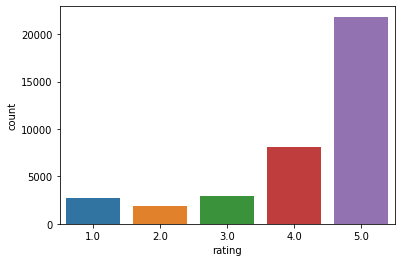

In [ ]:
# Applying pre-processing on the Watches dataset

df_Wat_pre = preprocessing(df_Wat)
df_Wat_pre

In [ ]:
#Text Preprocessing on Watches dataset


new_Wat = text_cleaning(df_Wat_pre)
new_Wat

     ProductID                                        ProductName   Price  \
14  B000PDESIM  Momentum Men's 1M-DV50S1 M50 DSS Silver Dial B...  294.95   
21  B0007OEQZO  Citizen Women's EG2280-51E Eco-Drive Charm Bra...   99.99   
22  B0007OEQZO  Citizen Women's EG2280-51E Eco-Drive Charm Bra...   99.99   
23  B0007OEQZO  Citizen Women's EG2280-51E Eco-Drive Charm Bra...   99.99   
24  B0007OEQZO  Citizen Women's EG2280-51E Eco-Drive Charm Bra...   99.99   

            UserID  rating                       review_summary  \
14   AZMDNMPDWLLI3     5.0           Tough, Good Looking Watch!   
21  A2WRNZRR891JYA     5.0  $265 watch at $65!!! its a steal :)   
22  A29H29DRLPLQHS     5.0                           cute watch   
23  A3P3IZ23ULHRFW     5.0   What a gorgeous watch!!! (for $65)   
24   A8VPWEUHAUDMU     5.0            Beautiful Eco-Drive watch   

                                          review_text  
14  I purchased a Momentum M1 diver's watch for my...  
21  U cant get such a 

,UserID,ProductID,rating,tags
14,AZMDNMPDWLLI3,B000PDESIM,5.0,"T o u g h , G o o d L o o k i n g W a t c h..."
21,A2WRNZRR891JYA,B0007OEQZO,5.0,$ 2 6 5 w a t c h a t $ 6 5 ! ! ! i t s a...
22,A29H29DRLPLQHS,B0007OEQZO,5.0,c u t e w a t c h T h e w a t c h i s n i ...
23,A3P3IZ23ULHRFW,B0007OEQZO,5.0,W h a t a g o r g e o u s w a t c h ! ! ! ...
24,A8VPWEUHAUDMU,B0007OEQZO,5.0,B e a u t i f u l E c o - D r i v e w a t c ...
...,...,...,...,...
68340,AVI205DG7EPL1,B000HX2X1O,5.0,E x c e l l e n t W a t c h I b o u g h t t...
68341,A3NBHG35DAJV0C,B000HX2X1O,5.0,B u l o v a w o m e n ' s m a r i n e s t a...
68342,A2ENKMMP4T30K9,B000HX2X14,3.0,C h e c k t h e b a n d s i z e b e f o r ...
68343,A1ZABTAL4DGTYG,B000HX2X14,5.0,B u l o v a W a t c h T h e d i a m o n d s ...


### *Converting the above final pre-processed datasets as pickle files for further implementation of machine learning models.*

In [ ]:
new_Elec.to_csv(r'/content/drive/MyDrive/Recommendation-System/ML Mini Project/final_Elec',index = False)
new_Cell.to_csv(r'/content/drive/MyDrive/Recommendation-System/ML Mini Project/final_Cell',index = False)
new_Wat.to_csv(r'/content/drive/MyDrive/Recommendation-System/ML Mini Project/final_Wat',index = False)

###**Conclusion:** 
***Data Cleaning and Pre-processing is succesfully implemented on the raw datasets. Now, we can import the preprocessed datasets mentioned above into another notebook containing our Machine Learning model(Code for Recommendation Engine).***